In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
import sys
import os
import pretrainedmodels
sys.path.append('../')
from fastai.vision import *
from modules.basics import *
from fastai.callbacks import *
np.random.seed(0)

# Data import

In [3]:
IMG_PATH = DATA_PATH

In [4]:
train_df = pd.read_csv(IMG_PATH/'train.csv'); len(train_df); train_df.head()

,image_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


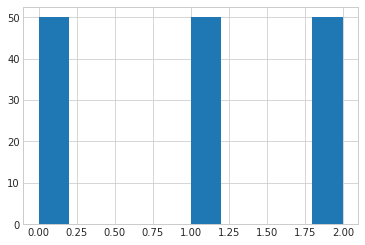

In [5]:
train_df.target.hist()

In [6]:
len(train_df[train_df.target==0])/len(train_df), len(train_df[train_df.target==1])/len(train_df)

(0.3333333333333333, 0.3333333333333333)

In [7]:
size = 224

In [8]:
train_df.head()

,image_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [9]:
data = ImageDataBunch.from_df(df=train_df, label_col='target', fn_col='image_name',
                              bs=16, ds_tfms=None, num_workers=8, valid_pct=0.2,
                              path=IMG_PATH/'images', folder='train', suffix='.png').normalize(imagenet_stats)

In [10]:
data

ImageDataBunch;

Train: LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,0
Path: ../data/images;

Valid: LabelList (30 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
2,1,0,2,0
Path: ../data/images;

Test: None

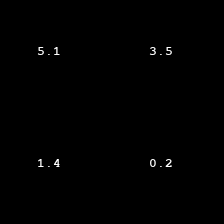

In [11]:
data.train_ds[0][0]

# Model training

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, pretrained=False)

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


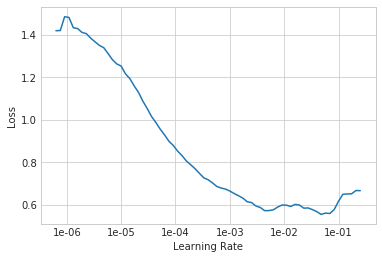

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-3),
                    callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best', mode='max')])

epoch,train_loss,valid_loss,accuracy,time
0,1.386332,1.146505,0.233333,00:01
1,1.162445,1.188081,0.266667,00:01
2,0.912408,1.142717,0.400000,00:01
3,0.695002,1.598426,0.366667,00:01
4,0.547128,2.209226,0.366667,00:01
5,0.430954,2.543666,0.366667,00:01
6,0.347349,1.721527,0.366667,00:01
7,0.283364,0.793117,0.733333,00:01
8,0.236102,0.313491,0.866667,00:01
9,0.196617,0.182441,0.933333,00:01


Better model found at epoch 0 with accuracy value: 0.23333333432674408.
Better model found at epoch 1 with accuracy value: 0.2666666805744171.
Better model found at epoch 2 with accuracy value: 0.4000000059604645.
Better model found at epoch 7 with accuracy value: 0.7333333492279053.
Better model found at epoch 8 with accuracy value: 0.8666666746139526.
Better model found at epoch 9 with accuracy value: 0.9333333373069763.
Better model found at epoch 12 with accuracy value: 1.0.
